<a href="https://colab.research.google.com/github/lfnd0/Machine_Learning/blob/master/ML_Atividade_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agrupamento com dados sobre câncer de próstata
> Dataset: [Prostate cancer](https://www.kaggle.com/sajidsaifi/prostate-cancer)

## 1. Leitura dos dados

In [ ]:
from google.colab import drive

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import fowlkes_mallows_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering

import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Machine_Learning/Datasets/Atividade_4/ca_prostata.csv')
data.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


## 2. Limpeza e organização dos dados

### 2.1 Limpeza dos dados

#### 2.1.1 Remoção da coluna 'id'

In [ ]:
data = data.dropna()
data = data.drop(columns = ['id'])
data.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,M,23,12,151,954,0.143,0.278,0.242,0.079
1,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,M,14,16,78,386,0.070,0.284,0.260,0.097
4,M,9,19,135,1297,0.141,0.133,0.181,0.059


#### 2.1.2 Mudança dos valores 'B' e 'M' para '0' e '1'

In [ ]:
data['diagnosis_result'] = data['diagnosis_result'].replace(['B', 'M'], [0, 1])
data.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,23,12,151,954,0.143,0.278,0.242,0.079
1,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,1,14,16,78,386,0.070,0.284,0.260,0.097
4,1,9,19,135,1297,0.141,0.133,0.181,0.059


### 2.2 Re-escala dos dados usando máximo e mínimo

In [ ]:
data = (data - data.min()) / (data.max() - data.min())
data.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1.0,0.8750,0.0625,0.825000,0.448687,1.000000,0.781759,0.633136,0.590909
1,0.0,0.0000,0.1250,0.675000,0.670644,1.000000,0.133550,0.272189,0.090909
2,1.0,0.7500,1.0000,0.650000,0.597255,0.753425,0.397394,0.426036,0.159091
3,1.0,0.3125,0.3125,0.216667,0.109785,0.000000,0.801303,0.739645,1.000000
4,1.0,0.0000,0.5000,0.691667,0.653341,0.972603,0.309446,0.272189,0.136364


### 2.3 Divisão dos dados

#### 2.3.1 Atributos de classe

Os atributos de classe para este dataset são:
*   B (*benign*) com valor 0.0
*   M (*malign*) com valor 1.0

In [ ]:
y = data.diagnosis_result
y.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: diagnosis_result, dtype: float64

#### 2.3.2 Atributos descritores

Os atributos descritores para este dataset são:
*    *radius*
*    *texture*
*    *perimeter*
*    *area*
*    *smoothness*
*    *compactness*
*    *symmetry*
*    *fractal_dimension*

In [ ]:
x = data.iloc[:, 1:]
x.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,0.8750,0.0625,0.825000,0.448687,1.000000,0.781759,0.633136,0.590909
1,0.0000,0.1250,0.675000,0.670644,1.000000,0.133550,0.272189,0.090909
2,0.7500,1.0000,0.650000,0.597255,0.753425,0.397394,0.426036,0.159091
3,0.3125,0.3125,0.216667,0.109785,0.000000,0.801303,0.739645,1.000000
4,0.0000,0.5000,0.691667,0.653341,0.972603,0.309446,0.272189,0.136364


## 3. Agrupamento com *K-means*

### 3.1 Criação do modelo e ajustes dos dados

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### 3.2 Aplicação do modelo aos dados de teste

In [ ]:
kmeans_labels = kmeans.predict(x)
kmeans_labels

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0], dtype=int32)

### 3.3 Visualização

In [ ]:
x = x.reset_index(drop=True)
clusters = pd.DataFrame(kmeans_labels)
x.insert((x.shape[1]), 'diagnosis_result', clusters)
benign = x[x['diagnosis_result'] == 0]
malign = x[x['diagnosis_result'] == 1]

#### 3.3.1 Textura, raio e perímetro

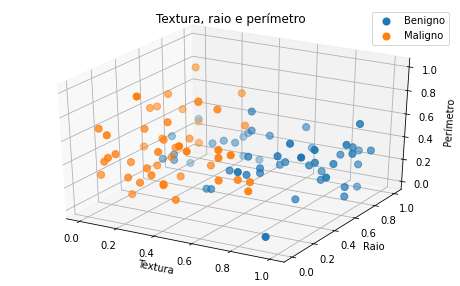

In [ ]:
plt.rcParams["figure.figsize"] = (8,5)
ax = plt.axes(projection='3d')
ax.scatter3D(benign.texture, benign.radius, benign.perimeter, s=50, label='Benigno')
ax.scatter3D(malign.texture, malign.radius, malign.perimeter, s=50, label='Maligno')
plt.legend()
ax.set_xlabel('Textura')
ax.set_ylabel('Raio')
ax.set_zlabel('Perímetro')
plt.title('Textura, raio e perímetro')
plt.show()

#### 3.3.2 Textura, raio e perímetro

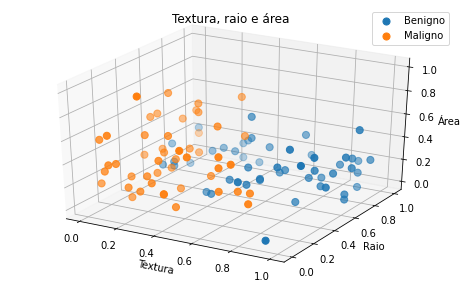

In [ ]:
plt.rcParams["figure.figsize"] = (8, 5)
ax = plt.axes(projection='3d')
ax.scatter3D(benign.texture, benign.radius, benign.area, s=50, label='Benigno')
ax.scatter3D(malign.texture, malign.radius, malign.area, s=50, label='Maligno')
plt.legend()
ax.set_xlabel('Textura')
ax.set_ylabel('Raio')
ax.set_zlabel('Área')
plt.title('Textura, raio e área')
plt.show()

#### 3.3.3 Comparação com atributos diversos

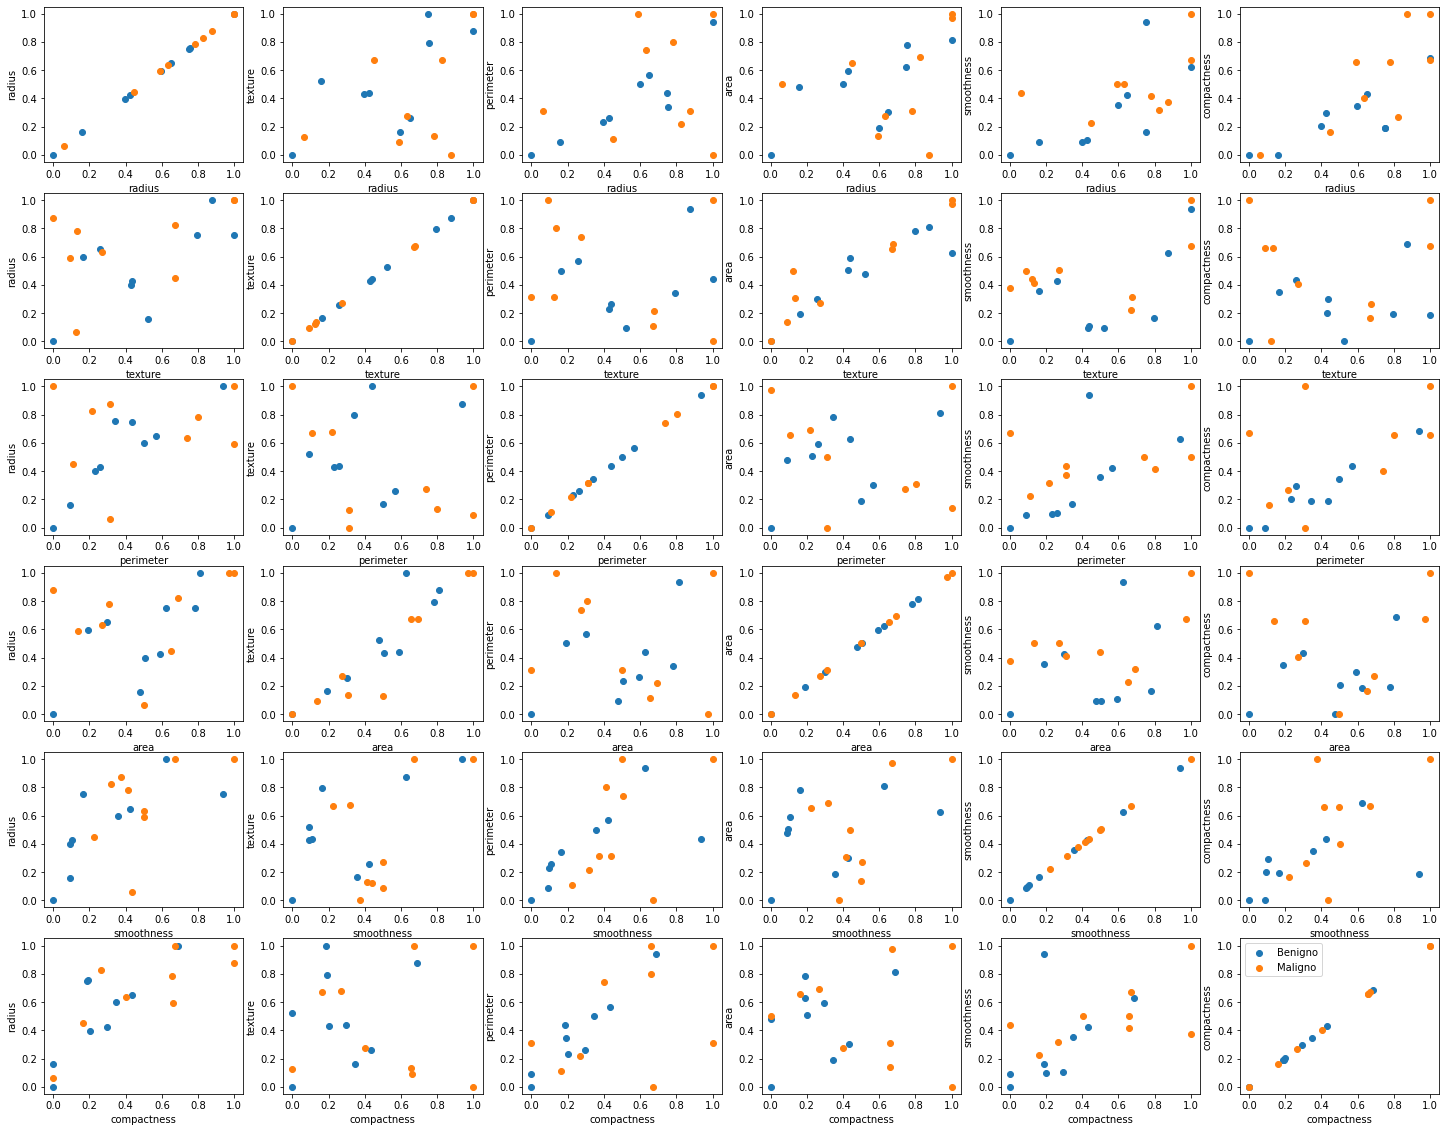

In [ ]:
plt.rcParams["figure.figsize"] = (25, 20)
fig, axs = plt.subplots(6, 6)
for i in range(6):
  for j in range(6):
    axs[i,j].scatter(benign.iloc[i], benign.iloc[j], label='Benigno')
    axs[i,j].scatter(malign.iloc[i], malign.iloc[j], label='Maligno')
    axs[i,j].set(xlabel=x.columns[i], ylabel=x.columns[j])
plt.legend()
plt.show()

### 3.4 Avaliação

#### Acurácia

In [ ]:
round(accuracy_score(y, kmeans_labels), 2)

0.65

#### Índice rand ajustado

In [ ]:
round(adjusted_rand_score(y, kmeans_labels), 2)

0.08

#### Score baseado em informação mútua

In [ ]:
round(adjusted_mutual_info_score(y, kmeans_labels), 2)

0.07

#### Fowlkes-Mallows score

In [ ]:
round(fowlkes_mallows_score(y, kmeans_labels), 2)

0.55

#### Índice Davies-Boldin

In [ ]:
x = x.drop(columns=['diagnosis_result'])

In [ ]:
round(davies_bouldin_score(x, kmeans_labels), 2)

1.88

#### Coeficiente de silhueta

In [ ]:
round(silhouette_score(x, kmeans_labels, metric='euclidean'), 2)

0.19

#### Índice Calinski-Harabasz

In [ ]:
round(calinski_harabasz_score(x, kmeans_labels), 2)

24.97

## 4. Agrupamento hierárquico aglomerativo

### 4.1 Criação do modelo

In [ ]:
agg_clt = AgglomerativeClustering(n_clusters=2)
labels_agg_clt = agg_clt.fit(x).labels_
labels_agg_clt

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0])

### 4.2 Avaliação

#### Acurácia

In [ ]:
round(accuracy_score(y, labels_agg_clt), 2)

0.65

#### Índice *rand* ajustado

In [ ]:
round(adjusted_rand_score(y, labels_agg_clt), 2)

0.08

#### *Score* baseado em informação mútua

In [ ]:
round(adjusted_mutual_info_score(y, labels_agg_clt), 2)

0.05

#### Fowlkes-Mallows *score*

In [ ]:
round(fowlkes_mallows_score(y, labels_agg_clt), 2)

0.55

#### Índice Davies-Boldin

In [ ]:
round(davies_bouldin_score(x, labels_agg_clt), 2)

1.95

#### Coeficiente de silhueta

In [ ]:
round(silhouette_score(x, labels_agg_clt, metric='euclidean'), 2)

0.18

#### Índice Calinski-Harabasz

In [ ]:
round(calinski_harabasz_score(x, labels_agg_clt))

23.0

## 5. Considerações



Tanto o agrupamento produzido com o algoritmo de *clustering* *K-means* quanto com a abordagem do Agrupamento Hierárquico Aglomerativo, obtiveram na maioria das métricas de avaliação valores baixos e/ou mais próximos de 0, o que pode levar a interpretação de que os *clusters* criados não foram os melhores. A exceção destes resultados para ambos os agrupamentos compete ao Índice de Davies-Boldin (Subseção 3.4, 4.2).